In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import entropy
plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False
plt.figure(dpi=150)

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

# Data preparation

In [2]:
df = pd.read_csv('../csv/preprocessed/7_label_blood_sugar.csv')
df

,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),수축기혈압,이완기혈압,...,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,BMI
0,1,8,43,170,75,90.0,1.0,1.0,120.0,80.0,...,126.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1.0,26.0
1,1,7,11,180,80,89.0,0.9,1.2,130.0,82.0,...,148.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0.0,24.7
2,1,9,41,165,75,91.0,1.2,1.5,120.0,70.0,...,74.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,0.0,27.5
3,1,11,48,175,80,91.0,1.5,1.2,145.0,87.0,...,104.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,0.0,26.1
4,1,11,30,165,60,80.0,1.0,1.2,138.0,82.0,...,117.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,0.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1165881,2,9,11,170,55,72.0,0.9,0.8,112.0,73.0,...,155.0,13.2,1.0,0.9,14.0,11.0,26.0,3.0,1.0,19.0
1165882,1,13,43,165,65,84.0,0.9,1.2,160.0,90.0,...,140.0,15.2,1.0,1.0,34.0,12.0,78.0,1.0,1.0,23.9
1165883,1,8,31,180,65,77.0,1.2,1.2,123.0,89.0,...,60.0,15.9,1.0,1.0,11.0,8.0,15.0,3.0,1.0,20.1
1165884,1,13,11,155,60,87.0,1.0,1.0,129.0,70.0,...,181.0,16.4,1.0,1.3,65.0,127.0,64.0,3.0,1.0,25.0


# Calculate entropy

In [19]:
def calc_entropy(df):
    features = list(df.columns)
    features.remove('식전혈당(공복혈당)')

    total = len(df)

    result = []
    for feature in features:
        result.append([feature, entropy(df[[feature, '식전혈당(공복혈당)']].value_counts() / total, base = 2)])
    
    result.sort(key=lambda x: x[1], reverse = True)

    result_df = pd.DataFrame(result, columns=['feature', 'entropy'])

    print('Total data count is ', total)
    print('Init entropy is ', entropy(df['식전혈당(공복혈당)'].value_counts() / total, base = 2))

    base_line = sum(result_df['entropy']) / 23
    colors = ['blue' if value > base_line else 'grey' for value in result_df['entropy']]

    plt.bar(result_df['feature'], result_df['entropy'], color=colors)
    plt.axhline(y=base_line, color='r', linestyle='-')

    plt.title('Entropy Calculation')
    plt.ylabel('Entropy')
    plt.xlabel('Feature')
    plt.xticks(rotation=90)
    plt.show()

Total data count is  1165886
Init entropy is  0.3872628068897627
['트리글리세라이드', '총콜레스테롤', 'LDL콜레스테롤', '허리둘레', '감마지티피', '혈색소', 'HDL콜레스테롤', '수축기혈압', '(혈청지오티)ALT', 'BMI', '이완기혈압', '(혈청지오티)AST', '', '', '', '', '', '', '', '', '', '', '']


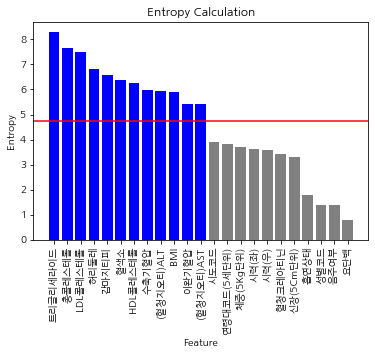

In [20]:
calc_entropy(df)

In [14]:
df.columns

Index(['성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레',
       '시력(좌)', '시력(우)', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드',
       'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST',
       '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부', 'BMI'],
      dtype='object')

In [36]:
labels = ['트리글리세라이드', 'LDL콜레스테롤', '(혈청지오티)AST', '감마지티피',
       '혈색소', 'BMI',
       '연령대코드(5세단위)', '허리둘레', '총콜레스테롤', 'HDL콜레스테롤', '(혈청지오티)ALT', 
       '수축기혈압','이완기혈압',
       '요단백', 
       '성별코드', '신장(5Cm단위)', '체중(5Kg단위)', '흡연상태']

result_entropy = ['트리글리세라이드', '총콜레스테롤', 'LDL콜레스테롤', '허리둘레', '감마지티피', '혈색소', 'HDL콜레스테롤', '수축기혈압', '(혈청지오티)ALT', 'BMI', '이완기혈압', '(혈청지오티)AST']

result_greedy = ['트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '(혈청지오티)ALT', '(혈청지오티)AST', '감마지티피', 'BMI']

result_RFC = ['연령대코드(5세단위)', '허리둘레', '수축기혈압', '이완기혈압', '총콜레스테롤', '트리글리세라이드',
       'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피',
       'BMI']

result_GBC = ['연령대코드(5세단위)', '허리둘레', '총콜레스테롤', '트리글리세라이드', 'LDL콜레스테롤', '요단백',
       '(혈청지오티)AST', '감마지티피']

result_LR = ['성별코드', '연령대코드(5세단위)', '신장(5Cm단위)', '체중(5Kg단위)', '혈색소', '요단백', '흡연상태',
       'BMI']

result_DTC = ['연령대코드(5세단위)', '허리둘레', '수축기혈압', '이완기혈압', '총콜레스테롤', '트리글리세라이드',
       'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피',
       'BMI']

In [37]:
value_entropy = []
for label in labels:
    if label in result_entropy:
        value_entropy.append(1)
    else:
        value_entropy.append(0)

value_greedy = []
for label in labels:
    if label in result_greedy:
        value_greedy.append(1)
    else:
        value_greedy.append(0)

value_RFC = []
for label in labels:
    if label in result_RFC:
        value_RFC.append(1)
    else:
        value_RFC.append(0)

value_GBC = []
for label in labels:
    if label in result_GBC:
        value_GBC.append(1)
    else:
        value_GBC.append(0)

value_LR = []
for label in labels:
    if label in result_LR:
        value_LR.append(1)
    else:
        value_LR.append(0)

value_DTC = []
for label in labels:
    if label in result_DTC:
        value_DTC.append(1)
    else:
        value_DTC.append(0)

In [38]:
df = pd.DataFrame({
        'Entropy': value_entropy,
        'Grid Search': value_greedy,
        'RandomForestClassifier': value_RFC,
        'GradientBoostingClassifier': value_GBC,
        'LogisticRegression': value_LR,
        'DecisionTreeClassifier': value_DTC
    },
    index=labels)
df

,Entropy,Grid Search,RandomForestClassifier,GradientBoostingClassifier,LogisticRegression,DecisionTreeClassifier
트리글리세라이드,1,1,1,1,0,1
LDL콜레스테롤,1,1,1,1,0,1
(혈청지오티)AST,1,1,1,1,0,1
감마지티피,1,1,1,1,0,1
혈색소,1,1,1,0,1,1
BMI,1,1,1,0,1,1
연령대코드(5세단위),0,0,1,1,1,1
허리둘레,1,0,1,1,0,1
총콜레스테롤,1,0,1,1,0,1
HDL콜레스테롤,1,1,1,0,0,1


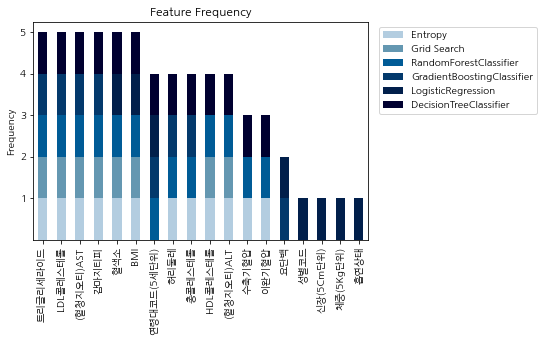

In [39]:
df.plot.bar(stacked=True, color=['#b3cde0', '#6497b1', '#005b96', '#03396c', '#011f4b', '#000030'])
plt.title('Feature Frequency')
plt.ylabel('Frequency')
plt.legend(loc='upper right', bbox_to_anchor=(1.52, 1.0))
plt.yticks(np.arange(1, 6))
plt.show()